# Stability Clustering Pipeline

## Step 1: Identify Clusters for Genes of Interest

In [4]:
from ddg_clustering.clustering import perform_clustering, ClusterType, AA_COLS
from ddg_clustering.prepare_data import prepare_protein_dataset

datapath = "sample_data/TAOK1_Q7L7X3_mutatex_af2_results/"
uniprot_id = "Q7L7X3"

# Optional: Generate a source dataframe for analysis directly 
# from raw mutatex results and a UniProt ID to identify an Alphafold model
clust_df = prepare_protein_dataset(datapath, uniprot_id)


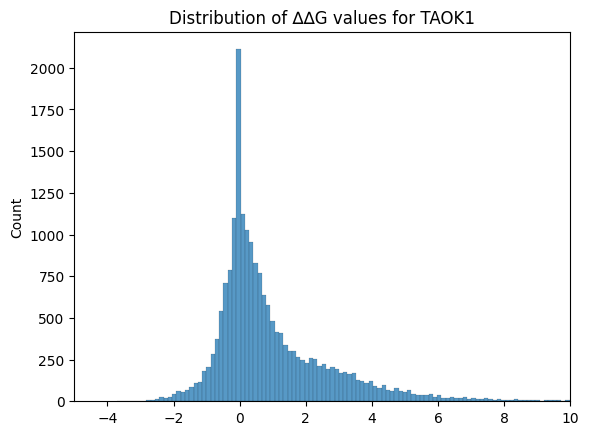

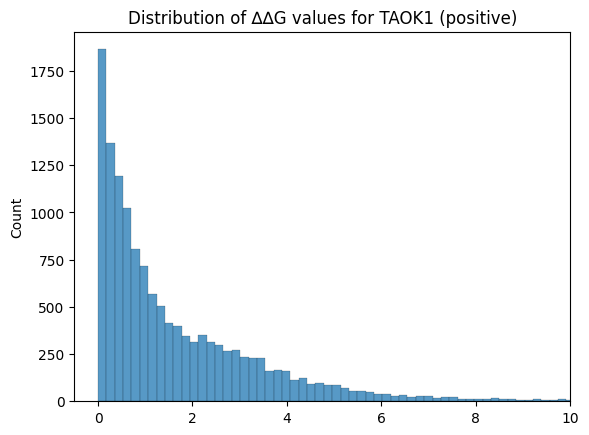

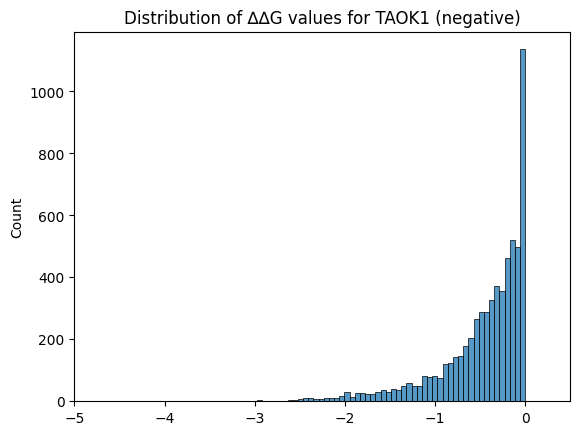

In [10]:

# Get all the values and plot a distribution
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# combine all to a single array and 1 column
all_values = np.array(clust_df[AA_COLS]).flatten()

# plot a distribution
sns.histplot(all_values)


# cut x axis at 15
plt.xlim(-5, 10)

# Title it
plt.title("Distribution of ∆∆G values for TAOK1")
plt.show()

# now repeat with xlim min of 0, then repeat with xlim max of 0 
# to get positive and negative distributions
sns.histplot(all_values[all_values >= 0])
plt.title("Distribution of ∆∆G values for TAOK1 (positive)")
plt.xlim(-0.5, 10)
plt.show()

sns.histplot(all_values[all_values < 0])
plt.title("Distribution of ∆∆G values for TAOK1 (negative)")
plt.xlim(-5, 0.5)
plt.show()



a: 1.07
c: 0.69
loc: -0.00
scale: 1.35


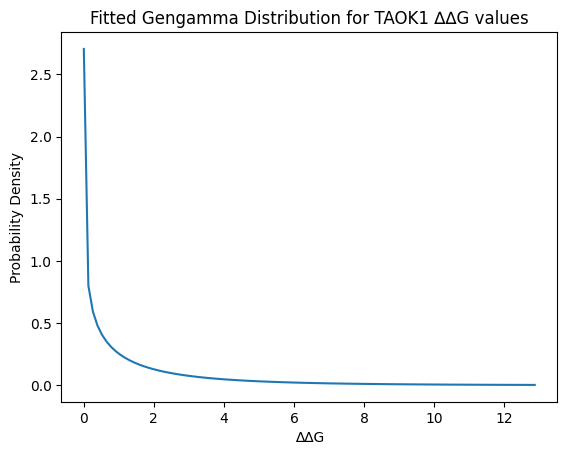

95% quantile: 6.998879585491188


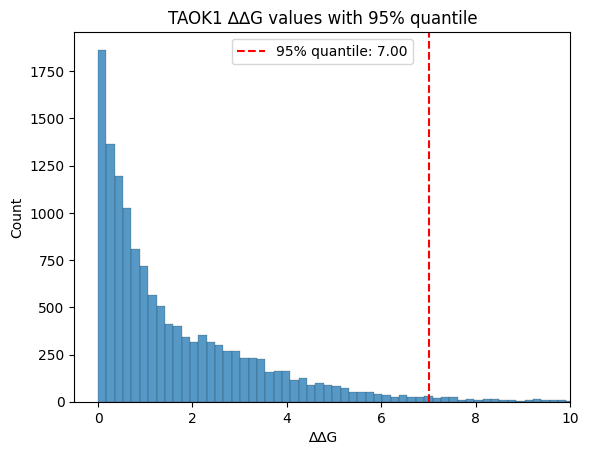

In [18]:
# Now fit a gengamma distribution to the data
from scipy.stats import gengamma

# fit a gengamma distribution to the positive values
params = gengamma.fit(all_values[all_values >= 0])

# plot the distribution from the fitted parameters
x = np.linspace(gengamma.ppf(0.01, *params), gengamma.ppf(0.99, *params), 100)
#sns.histplot(all_values[all_values >= 0])
plt.plot(x, gengamma.pdf(x, *params)) #, 'r-', lw=5, alpha=0.6, label='gengamma pdf')
plt.title("Fitted Gengamma Distribution for TAOK1 ∆∆G values")
plt.xlabel("∆∆G")
plt.ylabel("Probability Density")

# print out the 4 parameters with their names rounded to 2 decimal places
for i, param in enumerate(['a', 'c', 'loc', 'scale']):
    print(f'{param}: {params[i]:.2f}')

plt.show()

# find the 95% quantile
quantile = gengamma.ppf(0.95, *params)
print(f"95% quantile: {quantile}")

# replot the positive distribution with a vertical red line at the 95% quantile
sns.histplot(all_values[all_values >= 0])
plt.axvline(quantile, color='r', linestyle='--', label=f'95% quantile: {quantile:.2f}')
plt.legend()
plt.title("TAOK1 ∆∆G values with 95% quantile")
plt.xlabel("∆∆G")
plt.xlim(-0.5, 10)
plt.show()

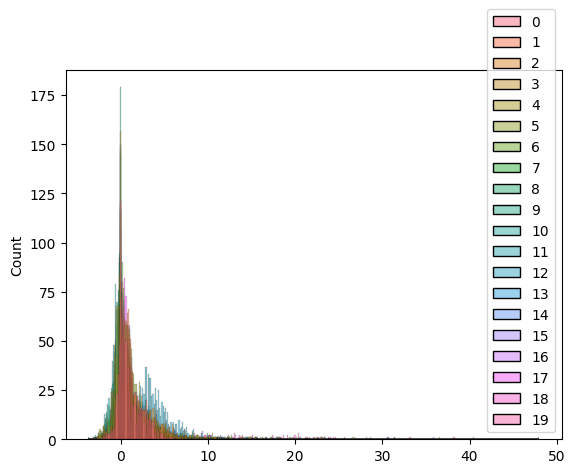

In [2]:

all_values = np.array(clust_df[AA_COLS])
sns.histplot(all_values)
plt.show()


In [ ]:

# Perform clustering 
# Data can be input as a dataframe or as a filename (filename = "example_input_data.csv")
# Cluster types can be LOSS_OF_STABILITY or GAIN_OF_STABILITY
# Use the cutoff param to manually override the stringency for clustering (cutoff=5)
clusters = perform_clustering(gene="TAOK1", residue_wise_df=clust_df, 
                              type=ClusterType.LOSS_OF_STABILITY)


## Step 2: Map clusters to structure via Genomics 2 Proteins portal Interactive Mapping

Save the clusters for structure mapping, then continue along in the README.md to the next step for visualization.

In [4]:
from ddg_clustering.clustering import save_clusters

save_clusters("NEK8_loss_of_stability_clusters.csv", clusters)